In [1]:
# import libraries, models and dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from time import time

In [2]:
# data splitting into training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# display the shapes of the mnist dataset
print(f"X_train shape:  {x_train.shape}")
print(f"Y_train shape:  {y_train.shape}")
print(f"X_test shape:  {x_test.shape}")
print(f"Y_test shape:  {y_test.shape}")

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


In [4]:
# reshape x_train and x_train to prepare it for FCN (Fully connected layers)
# currectly each data point in the given dataset is a 2D array of 28x28, which means there are 28 and 28 colums and a total of 784 points
x_train_reshaped = x_train.reshape(60000,784)
x_test_reshaped = x_test.reshape(10000,784)

print(f"X_train reshaped:  {x_train_reshaped.shape}")
print(f"X_test reshaped:  {x_test_reshaped.shape}")

X_train reshaped:  (60000, 784)
X_test reshaped:  (10000, 784)


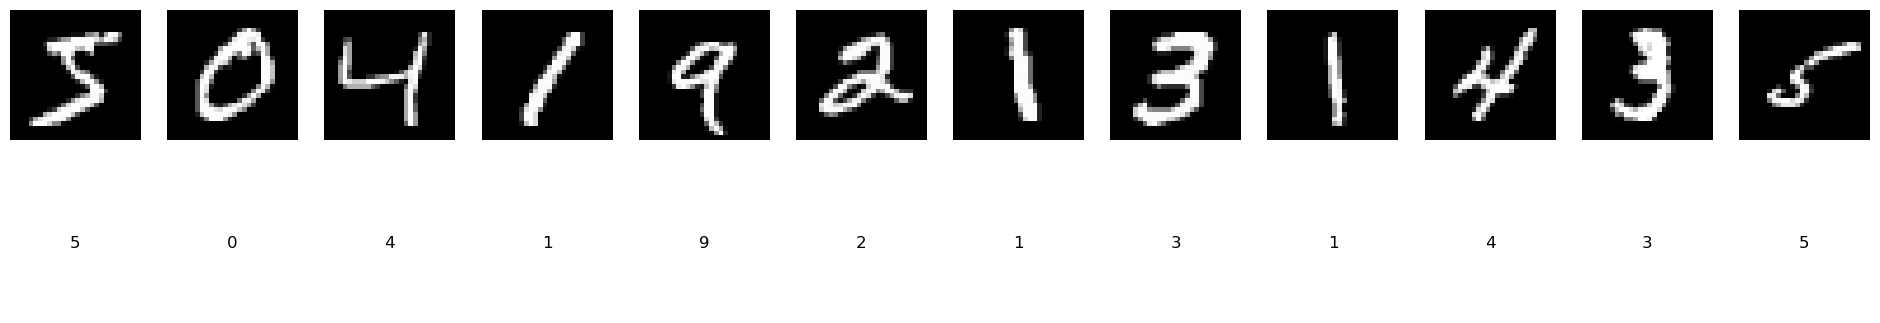

In [5]:
# let's print the first 12 images from x_train 

#number of images
img_number = 12

# create a fiqure size
plt.figure(figsize=(24,4))

# plot each img as a sub plot in the created figure
for i in range(img_number):

    # create a sub plot ---> 2 is for padding, 
    sub_plot = plt.subplot(2, img_number, i+1)
    plt.axis('off')

    # show img
    plt.imshow(x_train[i])

    # img should be in grayscale
    plt.gray()

    # Display digit label
    sub_plot = plt.subplot(2, img_number, i + 1 + img_number)
    
    plt.text(0.5, 0.5, str(y_train[i]), fontsize=12, ha='center', va='center')
    
    # Hide x-axis and y-axis labels and ticks
    plt.axis('off')

# show the whole figure
plt.show()
plt.close() # close the plot

In [6]:
# Convert the data type of the images to float32
x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
x_train_reshaped /= 255
x_test_reshaped /= 255

In [7]:
# Number of classes in the dataset
classes = 10

# Convert the labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, classes)
y_test_encoded = to_categorical(y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train_reshaped shape: {} \nNew Y_train_encoded shape:{}".format(x_train_reshaped.shape, y_train_encoded.shape)) 

New X_train_reshaped shape: (60000, 784) 
New Y_train_encoded shape:(60000, 10)


In [14]:
# hyperparameters selection

# input size for each datapoint --> here in this case each img is of 784 pixels so the inpit_size should be
input_size = 784

# hidden layer 1
hidden1 = 342

# hidden layer 2
hidden2 = 34

# output layer --> number of classes we've 10
classes =  10

# divide the whole data into batches for smooth processing 
batch_size = 150 

# the number of data learnings cycles
epochs = 50

In [15]:
# Building model

# create an object of Sequential model
model = Sequential()

# adding layers
# layer 1
model.add(Dense(hidden1, input_dim = input_size, activation = 'relu' ))

# layer 2
model.add(Dense(hidden2, activation = 'relu' ))


# output layer
model.add(Dense(classes, activation = "softmax" ))

# compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="sgd")

# disply a summary of the model architecture --> number of layers and paramerters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 342)               268470    
                                                                 
 dense_4 (Dense)             (None, 34)                11662     
                                                                 
 dense_5 (Dense)             (None, 10)                350       
                                                                 
Total params: 280482 (1.07 MB)
Trainable params: 280482 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# start time count and store it in tic
tic = time()

# call fit and pass training data
model.fit(x_train_reshaped, y_train_encoded, batch_size=batch_size, epochs=epochs, verbose=1)

# notice time count and store it in toc
toc = time()

# time the models took for training
print("Model traing took {} secs".format(toc-tic))


Epoch 1/50
400/400 [==============================] - 2s 4ms/step - loss: 1.3111 - accuracy: 0.6805
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.5394 - accuracy: 0.8615
Epoch 3/50
400/400 [==============================] - 2s 4ms/step - loss: 0.4112 - accuracy: 0.8867
Epoch 4/50
400/400 [==============================] - 1s 4ms/step - loss: 0.3573 - accuracy: 0.8997
Epoch 5/50
400/400 [==============================] - 2s 4ms/step - loss: 0.3252 - accuracy: 0.9082
Epoch 6/50
400/400 [==============================] - 2s 5ms/step - loss: 0.3021 - accuracy: 0.9137
Epoch 7/50
400/400 [==============================] - 2s 4ms/step - loss: 0.2840 - accuracy: 0.9189
Epoch 8/50
400/400 [==============================] - 2s 4ms/step - loss: 0.2690 - accuracy: 0.9231
Epoch 9/50
400/400 [==============================] - 2s 4ms/step - loss: 0.2562 - accuracy: 0.9272
Epoch 10/50
400/400 [==============================] - 1s 4ms/step - loss: 0.2448 - accuracy: 0.9304

In [17]:
# Model testing

# probabilities for the test set using the trained model
y_pred_probs =  model.predict(x_test_reshaped, verbose=1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

test_accuracy = accuracy_score(y_pred, y_test_encoded)
print("Test accuracy : ", test_accuracy)

313/313 [==============================] - 1s 2ms/step
Test accuracy :  0.9649


In [18]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = x_test_reshaped[0:20]
actual_labels = y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs= model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs > 0.5, 1, 0)


1/1 [==============================] - 0s 33ms/step


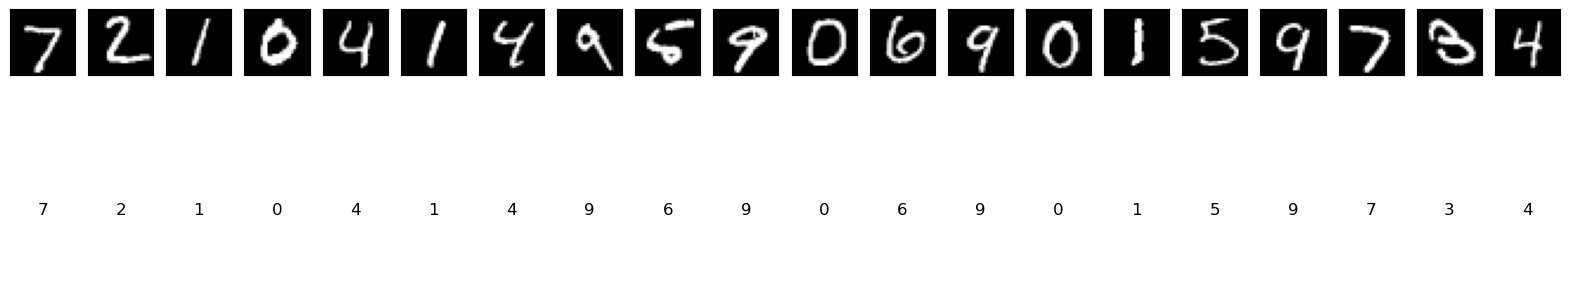

In [19]:
# Set up a figure to display images
n = len(X_valid)

plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)

    plt.imshow(X_valid[i].reshape(28, 28))

    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs[i])

    ax = plt.subplot(2, n, i + 1 + n)
    
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
